In [75]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from sklearn import metrics

In [76]:
data = pd.read_csv('/Users/christine/Desktop/merged_frankfurt_dresden.csv', encoding= 'unicode_escape', sep=',', header=0)

1.0


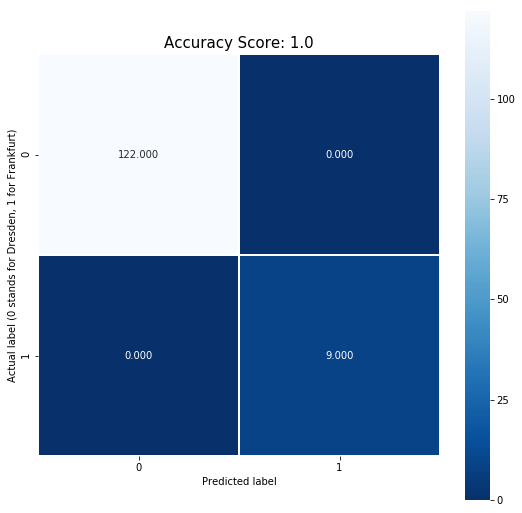

In [80]:
# Multiple logistic regression to decide Frankfurt or not (and therefore Dresden)
data_set = data.copy()
for i in range(0, len(data_set)):
    if(data.loc[i,'Stadt'] == "Dresden"):
        data_set.at[i,'Stadt'] = 0
    else:
        data_set.at[i,'Stadt'] = 1
        
data_x = data.loc[:, 'Stimmen CDU':'Stimmen Piraten']
data_y = data_set.loc[:,'Stadt']
data_y = data_y.astype('int')

x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, test_size=0.25, random_state=0)

logisticRegr = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

logisticRegr.fit(x_train, y_train)

predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label (0 stands for Dresden, 1 for Frankfurt)');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.savefig('acurracy.png')
#plt.show();
